# Lab1

In [23]:
import numpy as np
data = a = np.random.randint(0,11,(36,))
data.reshape(2,3,6)

data2 = data.reshape(4,9)
data3 = (data2+4).T
data4 = data2@data3

print(data2)
np.array([data2[0, :8:2],data2[1, 1::2], data2[2, :8:2], data2[3, 1:9:2]])

[[5 1 2 7 1 2 1 5 3]
 [8 0 9 7 9 4 4 1 8]
 [8 5 6 6 9 6 8 3 0]
 [6 5 3 7 9 6 8 9 3]]


array([[5, 2, 1, 1],
       [0, 7, 4, 1],
       [8, 6, 9, 8],
       [5, 7, 6, 9]])

# Lab2

In [31]:
import sklearn.datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
iris = sklearn.datasets.load_iris()
X=iris.data
y=iris.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12)


In [32]:
from sklearn.metrics import accuracy_score 
def model_fit(model,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(accuracy_score(y_pred,y_test))
    
model = GaussianNB()
model_fit(model)
model = DecisionTreeClassifier()
model_fit(model)
model = AdaBoostClassifier()
model_fit(model)

0.9666666666666667
0.9333333333333333
0.9333333333333333


# Lab3

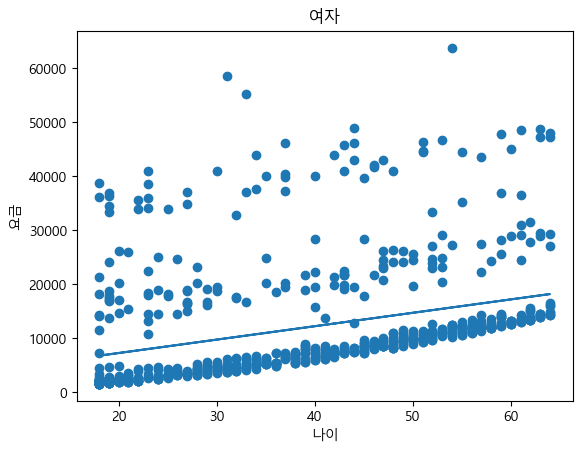

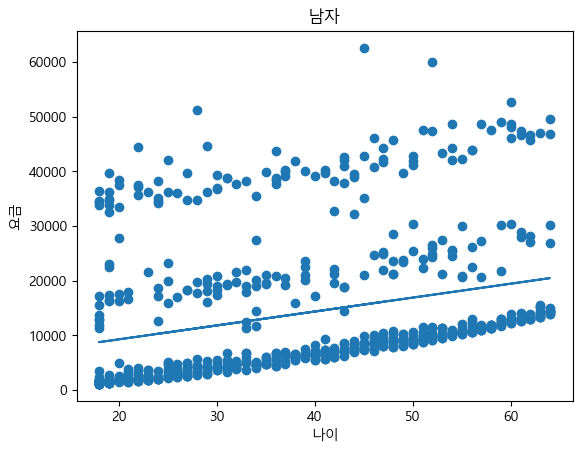

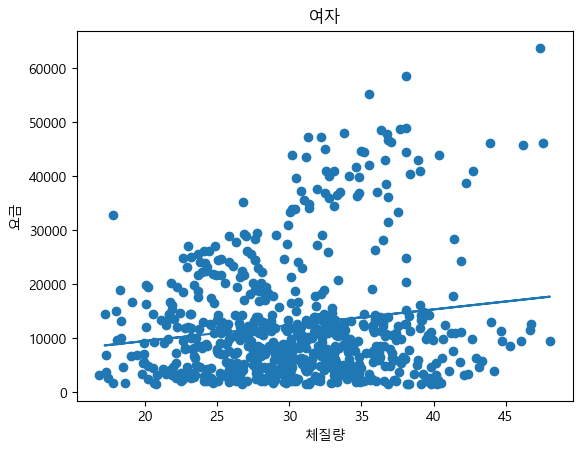

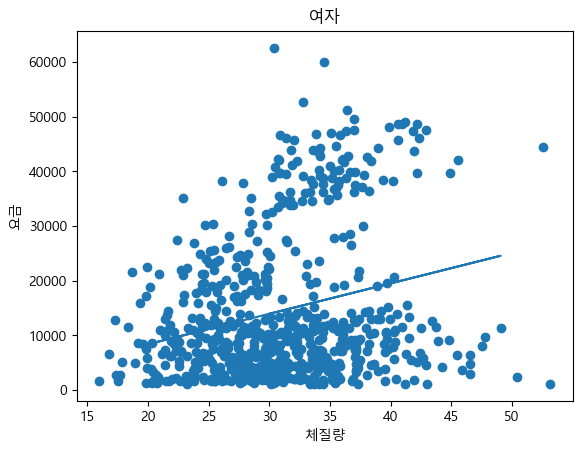

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

insu = pd.read_csv('./insurance.csv')

men = insu['sex']=='male'
women = insu['sex']=='female'
male = insu[men]
female = insu[women]

X_male_age = male[['age']]
y_male = male['charges']
X_female_age = female[['age']]
y_female = female['charges']

X_train, X_test, y_train, y_test = train_test_split(X_female_age, y_female, test_size=0.2)

women_model = LinearRegression()
women_model.fit(X_train, y_train)
y_pred = women_model.predict(X_test)

plt.scatter(X_female_age, y_female)
plt.plot(X_test,y_pred)
plt.xlabel('나이')
plt.ylabel('요금')
plt.title('여자')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_male_age, y_male, test_size=0.2)
men_model = LinearRegression()
men_model.fit(X_train, y_train)
y_pred = men_model.predict(X_test)
plt.scatter(X_male_age, y_male)
plt.plot(X_test, y_pred)
plt.xlabel('나이')
plt.ylabel('요금')
plt.title('남자')
plt.show()

X_male_age = male[['bmi']]
y_male = male['charges']
X_female_age = female[['bmi']]
y_female = female['charges']

X_train, X_test, y_train, y_test = train_test_split(X_female_age, y_female, test_size=0.2)

women_model = LinearRegression()
women_model.fit(X_train, y_train)
y_pred = women_model.predict(X_test)

plt.scatter(X_female_age, y_female)
plt.plot(X_test,y_pred)
plt.xlabel('체질량')
plt.ylabel('요금')
plt.title('여자')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_male_age, y_male, test_size=0.2)

women_model = LinearRegression()
women_model.fit(X_train, y_train)
y_pred = women_model.predict(X_test)

plt.scatter(X_male_age, y_male)
plt.plot(X_test,y_pred)
plt.xlabel('체질량')
plt.ylabel('요금')
plt.title('여자')
plt.show()

In [75]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
 # Pandas Data 읽기맨위컬럼의값을을 col_names으로 정하기
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin','bmi', 'pedigree', 
'age', 'label']

 #Pandas로 데이터 읽고 각 컬럼별 속성을 col_name으로 설정하기 정하기 
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)
pima=pima[1:]

feature_cols = ['pregnant', 'insulin','bmi','age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

from sklearn.model_selection import cross_val_predict, StratifiedKFold

model = LogisticRegression()
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(model,X,y,cv=kf)

conf = confusion_matrix(y,y_pred)
tn, fp, fn, tp = conf.ravel()

# 결과 출력
print(f"Confusion Matrix: \n{conf}")
print(f"TP: {tp}")
print(f"TN: {tn}")
print(f"FP: {fp}")
print(f"FN: {fn}")

# 정밀도, 재현율 등 
print(classification_report(y, y_pred))

Confusion Matrix: 
[[440  60]
 [115 153]]
TP: 153
TN: 440
FP: 60
FN: 115
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       500
           1       0.72      0.57      0.64       268

    accuracy                           0.77       768
   macro avg       0.76      0.73      0.74       768
weighted avg       0.77      0.77      0.77       768



c:\Users\gudtj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\gudtj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

# Lab1 

In [14]:
import numpy as np

data = np.random.randint(0,11,(36,))

data2 = data.reshape(2,3,6)
data3 = data.reshape(4,9)
data4 = (data3+3).T
data5 = data3@data4

data6 = np.array(
    [data3[0,:7:2],
    data3[1,1::2],
    data3[2,:7:2],
    data3[3,1::2]]
)
print(data3)
data6

[[ 6  2  6  9  4  0  8  1  7]
 [ 2  5  5  5  1  0  1  7  6]
 [ 2 10  2  8  7  4  5 10  0]
 [ 4 10  6  1  6  7  9  4  4]]


array([[ 6,  6,  4,  8],
       [ 5,  5,  0,  7],
       [ 2,  2,  7,  5],
       [10,  1,  7,  4]])

# Lab2

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

iris = load_iris()
X=iris.data
y=iris.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [22]:
def Model_predict(model):
    global X_train,X_test,y_train,y_test
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(accuracy_score(y_test,y_pred))

model=GaussianNB()
Model_predict(model)

model=DecisionTreeClassifier()
Model_predict(model)

model=AdaBoostClassifier()
Model_predict(model)


0.9666666666666667
0.9333333333333333
0.9333333333333333


# Lab3

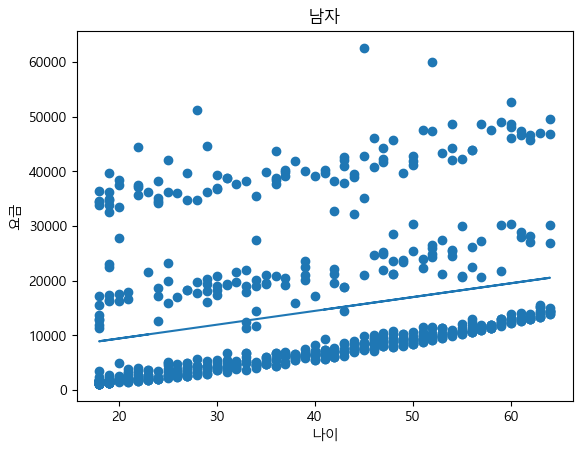

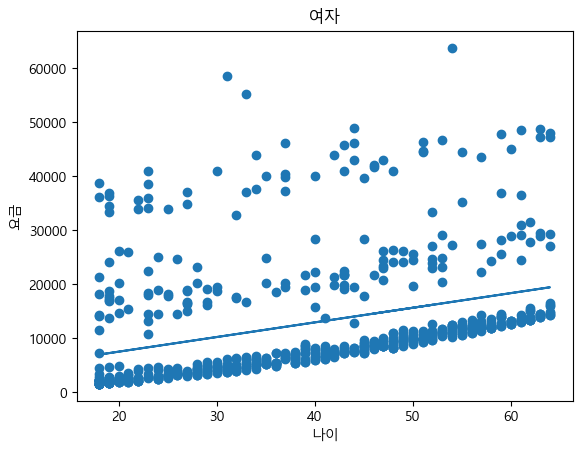

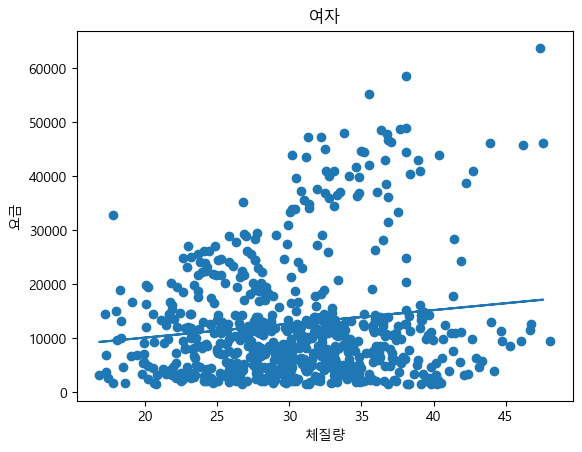

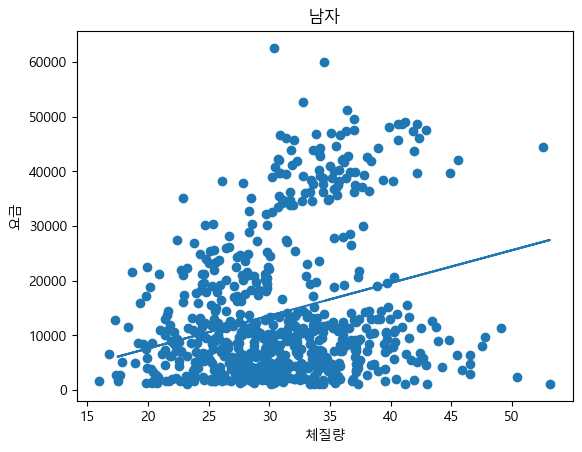

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

insu = pd.read_csv('./insurance.csv')
men=insu['sex']=='male'
women=insu['sex']=='female'


men_data = insu[men]
X_men_data = men_data[['age']]
y_men_data = men_data['charges']
X_train, X_test, y_train, y_test = train_test_split(X_men_data, y_men_data, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.scatter(X_men_data, y_men_data)
plt.plot(X_test,y_pred)
plt.xlabel('나이')
plt.ylabel('요금')
plt.title('남자')
plt.show()

women_data = insu[women]
X_women_data = women_data[['age']]
y_women_data = women_data['charges']
X_train, X_test, y_train, y_test = train_test_split(X_women_data, y_women_data, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.scatter(X_women_data, y_women_data)
plt.plot(X_test,y_pred)
plt.xlabel('나이')
plt.ylabel('요금')
plt.title('여자')
plt.show()


X_women_data = women_data[['bmi']]
y_women_data = women_data['charges']
X_train, X_test, y_train, y_test = train_test_split(X_women_data, y_women_data, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.scatter(X_women_data, y_women_data)
plt.plot(X_test,y_pred)
plt.xlabel('체질량')
plt.ylabel('요금')
plt.title('여자')
plt.show()

X_men_data = men_data[['bmi']]
y_men_data = men_data['charges']
X_train, X_test, y_train, y_test = train_test_split(X_men_data, y_men_data, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.scatter(X_men_data, y_men_data)
plt.plot(X_test,y_pred)
plt.xlabel('체질량')
plt.ylabel('요금')
plt.title('남자')
plt.show()

In [53]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression

 # Pandas Data 읽기맨위컬럼의값을을 col_names으로 정하기
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin','bmi', 'pedigree', 
'age', 'label']
 #Pandas로 데이터 읽고 각 컬럼별 속성을 col_name으로 설정하기 정하기 
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)
pima=pima[1:]
feature_cols = ['pregnant', 'insulin','bmi','age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable



model = LogisticRegression()
kf = StratifiedKFold(5, shuffle=True, random_state=42)
y_pred = cross_val_predict(model,X,y,cv=kf)

confusion_matrix(y_pred,y)

print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       500
           1       0.72      0.57      0.64       268

    accuracy                           0.77       768
   macro avg       0.76      0.73      0.74       768
weighted avg       0.77      0.77      0.77       768



c:\Users\gudtj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\gudtj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st